<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Normal-Equation-(OLS)" data-toc-modified-id="Normal-Equation-(OLS)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Normal Equation (OLS)</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Batch-GD" data-toc-modified-id="Batch-GD-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Batch GD</a></span></li><li><span><a href="#Stochastic-GD" data-toc-modified-id="Stochastic-GD-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Stochastic GD</a></span></li></ul></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#Learning-Curves" data-toc-modified-id="Learning-Curves-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Learning Curves</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Regularization</a></span><ul class="toc-item"><li><span><a href="#Ridge-regression-(l2)" data-toc-modified-id="Ridge-regression-(l2)-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Ridge regression (l2)</a></span></li><li><span><a href="#Lasso-Regression-(l1)" data-toc-modified-id="Lasso-Regression-(l1)-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Lasso Regression (l1)</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Elastic Net</a></span></li><li><span><a href="#Early-Stopping" data-toc-modified-id="Early-Stopping-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Early Stopping</a></span></li></ul></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></div>

# Book - Training of models (Chapter 4)

## Linear Regression

### Normal Equation (OLS)

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

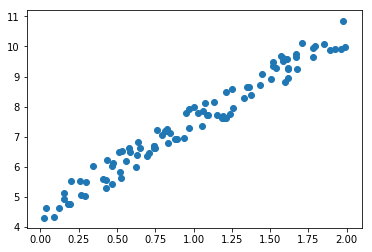

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)), X]
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
beta

array([[4.47281551],
       [3.01709028]])

In [6]:
X_new = np.array([[0], [2]])

In [7]:
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(beta)

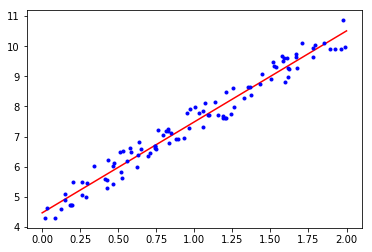

In [8]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'b.')
plt.show()

with scikit learn:

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.47281551]), array([[3.01709028]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.47281551],
       [10.50699607]])

### Gradient Descent

When using Gradient Descent, each variable should have the same scale (ex: Standard Scaler)

#### Batch GD

In [11]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.47281551],
       [3.01709028]])

#### Stochastic GD

SGD is better to find global optima that Batch GD if the function is not convex since SGD is unstable even near a local optima which can make him jumps away from it.

Even this way, it can jumps away from the global minimum, so we need to dincrease the learning rate over time: this is called simulated annealing (recuit simulé) and is controlled by a function called learning schedule (échéancier d'apprentissage)

In [13]:
n_epochs = 50 # number of time all of the data is seen
t0, t1 = 5, 50 # hyperparameters of the learning schedule

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.rand(2,1) # random init.

for epoch in range(n_epochs):
    for i in range(m): #for each training data
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m +i)
        theta = theta - eta * gradients
theta

array([[4.46191898],
       [3.02664822]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.48029818]), array([3.02896254]))

### Polynomial Regression

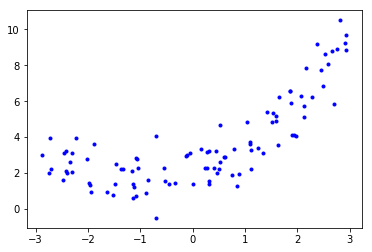

In [15]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.36998496])

In [17]:
X_poly[0]

array([-1.36998496,  1.87685879])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.05185872]), array([[0.97151141, 0.49278667]]))

In [19]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

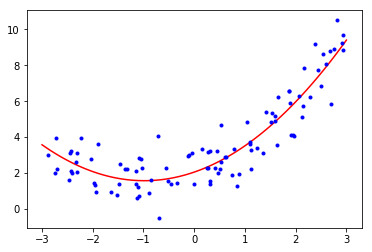

In [20]:
plt.plot(X_new, y_new, 'r')
plt.plot(X, y, 'b.')
plt.show()

### Learning Curves

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')     
    plt.legend()

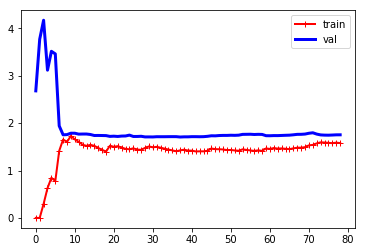

In [35]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

This type was clearly underfitting (both curves pretty high and close), let's add polynomial terms

(0, 3)

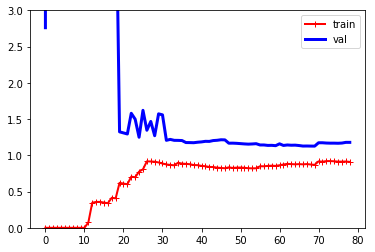

In [43]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('lin_reg', LinearRegression()),
        ))
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0,3)µ

### Regularization

#### Ridge regression (l2)
also called Tikhonov regularization (ou réduction de crêtes)

In [44]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.02983989]])

SAG means Stochastic Average GD, a variant of SGD

In [48]:
ridge_reg = Ridge(alpha=1, solver = 'sag')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.03325569]])

In [47]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.28771778])

#### Lasso Regression (l1)
Least Absolute Shrinkage and Selection Operator

In [49]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.98850209])

In [50]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\Victor\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.2573627])

#### Elastic Net

mix ratio <b>r</b>

when r = 0 => ridge<br>
when r = 1 => lasso

So when to use regularization ?<br>
By default, it's a good idea to use ridge, but if you think only a few variables are useful, it might be better to try also Lasso and Elastic Net (better Elastic Net than Lasso)

In [51]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5) #L1_ratio corresponds to mix ratio r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.98830757])

#### Early Stopping

When the loss function stabilizes around a really small value, we can stop GD. 
For SGD, it's better to wait some more to be sure it's stabilized and come back to previous parameters that minimized the objective function

In [ ]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #restart at stopping point
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_model = epoch
        best_model = clone(sgd_reg)    

warm_start = True means that the fit method start back at where he left off

## Logistic Regression

In [54]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [64]:
X = iris['data'][:,3:] #petal width
y = (iris['target']==2).astype(np.int) #1 if iris virginica, else 0

In [65]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

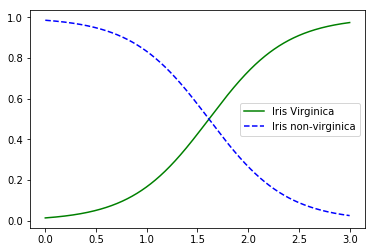

In [76]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label = 'Iris Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Iris non-virginica')
plt.legend()
plt.show()

In [79]:
log_reg.predict([[1.7],[1.6]])

array([1, 0])

Softmax regression

In [86]:
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
softmax_reg.predict([[5, 2]])

array([2])

In [85]:
softmax_reg.predict_proba([[5, 2]])

array([[1.00291780e-05, 1.15546066e-01, 8.84443904e-01]])